In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [19]:
df = pd.read_parquet("data/dataset_procesada.parquet", engine="pyarrow")
df

,exportaciones,importaciones,precio_petroleo,igae,pib
fecha,,,,,
2008-07-01,0.479404,-0.166921,-0.428911,-0.377520,-0.377253
2008-10-01,-0.464530,-0.299388,-4.980502,0.043954,0.044118
2009-01-01,-1.830490,-0.799384,-1.258124,-0.886499,-0.886790
2009-04-01,0.351428,0.610267,1.486259,1.044652,1.044620
2009-07-01,0.507688,0.562842,0.805708,-0.269542,-0.269595
...,...,...,...,...,...
2023-10-01,-0.962161,-0.142624,-0.278666,1.456893,1.457181
2024-01-01,-1.819530,-1.538745,-0.043245,-1.900043,-1.900086
2024-04-01,1.676057,0.969903,0.384582,0.500751,0.500713


In [20]:
def crear_modelo_regresion(df):
    """
    Crea y evalúa un modelo de regresión múltiple para predecir el PIB de Bolivia
    
    Parámetros:
    df: DataFrame con las columnas 'pib', 'exportaciones', 'importaciones', 'igae', 'precio_petroleo'
    """
    
    # Definir variables independientes (X) y dependiente (y)
    variable_dependiente = 'pib'
    X = df.drop(columns=[variable_dependiente])
    y = df[variable_dependiente]

    
    # Dividir los datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, shuffle=True
    )
    
    print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]}")
    print(f"Tamaño del conjunto de prueba: {X_test.shape[0]}")
    
    # Crear y entrenar el modelo
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)
    
    # Realizar predicciones
    y_pred_train = modelo.predict(X_train)
    y_pred_test = modelo.predict(X_test)
    
    return modelo, X_train, X_test, y_train, y_test, y_pred_train, y_pred_test

In [31]:
def evaluar_modelo(modelo, X_train, X_test, y_train, y_test, y_pred_train, y_pred_test):
    """
    Evalúa el modelo de regresión múltiple y muestra métricas de rendimiento
    """
    
    print("="*60)
    print("EVALUACIÓN DEL MODELO DE REGRESIÓN MÚLTIPLE")
    print("="*60)
    
    # Coeficientes del modelo
    variables = X_train.columns
    print("\n1. COEFICIENTES DEL MODELO:")
    print(f"Intercepto: {modelo.intercept_:.4f}")
    for i, var in enumerate(variables):
        print(f"{var}: {modelo.coef_[i]:.4f}")
    
    # Métricas de entrenamiento
    print("\n2. MÉTRICAS DE ENTRENAMIENTO:")
    r2_train = r2_score(y_train, y_pred_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"R² Score: {r2_train:.4f}")
    print(f"RMSE: {rmse_train:.4f}")
    print(f"MAE: {mae_train:.4f}")
    
    # Métricas de prueba
    print("\n3. MÉTRICAS DE PRUEBA:")
    r2_test = r2_score(y_test, y_pred_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae_test = mean_absolute_error(y_test, y_pred_test)
    
    print(f"R² Score: {r2_test:.4f}")
    print(f"RMSE: {rmse_test:.4f}")
    print(f"MAE: {mae_test:.4f}")
    
    # R² ajustado
    n = len(y_train)
    p = len(variables)
    r2_adj = 1 - (1 - r2_train) * (n - 1) / (n - p - 1)
    print(f"\n4. R² AJUSTADO: {r2_adj:.4f}")
    
    return {
        'r2_train': r2_train,
        'r2_test': r2_test,
        'rmse_train': rmse_train,
        'rmse_test': rmse_test,
        'mae_train': mae_train,
        'mae_test': mae_test,
        'r2_adjusted': r2_adj
    }

In [22]:
def graficar_resultados(y_train, y_test, y_pred_train, y_pred_test):
    """
    Genera gráficos para visualizar el rendimiento del modelo
    """
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Gráfico 1: Valores reales vs predicciones (entrenamiento)
    axes[0,0].scatter(y_train, y_pred_train, alpha=0.7, color='blue')
    axes[0,0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
    axes[0,0].set_xlabel('Valores Reales')
    axes[0,0].set_ylabel('Predicciones')
    axes[0,0].set_title('Entrenamiento: Valores Reales vs Predicciones')
    axes[0,0].grid(True, alpha=0.3)
    
    # Gráfico 2: Valores reales vs predicciones (prueba)
    axes[0,1].scatter(y_test, y_pred_test, alpha=0.7, color='green')
    axes[0,1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[0,1].set_xlabel('Valores Reales')
    axes[0,1].set_ylabel('Predicciones')
    axes[0,1].set_title('Prueba: Valores Reales vs Predicciones')
    axes[0,1].grid(True, alpha=0.3)
    
    # Gráfico 3: Residuos (entrenamiento)
    residuos_train = y_train - y_pred_train
    axes[1,0].scatter(y_pred_train, residuos_train, alpha=0.7, color='blue')
    axes[1,0].axhline(y=0, color='r', linestyle='--')
    axes[1,0].set_xlabel('Predicciones')
    axes[1,0].set_ylabel('Residuos')
    axes[1,0].set_title('Residuos - Entrenamiento')
    axes[1,0].grid(True, alpha=0.3)
    
    # Gráfico 4: Residuos (prueba)
    residuos_test = y_test - y_pred_test
    axes[1,1].scatter(y_pred_test, residuos_test, alpha=0.7, color='green')
    axes[1,1].axhline(y=0, color='r', linestyle='--')
    axes[1,1].set_xlabel('Predicciones')
    axes[1,1].set_ylabel('Residuos')
    axes[1,1].set_title('Residuos - Prueba')
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()


In [23]:
def analisis_residuos(y_train, y_pred_train):
    """
    Análisis de los residuos para verificar supuestos del modelo
    """
    residuos = y_train - y_pred_train
    
    print("\n5. ANÁLISIS DE RESIDUOS:")
    
    # Test de normalidad de residuos (Shapiro-Wilk)
    if len(residuos) <= 5000:  # Shapiro-Wilk tiene límite de muestra
        stat, p_value = stats.shapiro(residuos)
        print(f"Test de Normalidad (Shapiro-Wilk): p-valor = {p_value:.4f}")
        if p_value > 0.05:
            print("Los residuos siguen una distribución normal (p > 0.05)")
        else:
            print("Los residuos NO siguen una distribución normal (p ≤ 0.05)")
    
    # Estadísticas básicas de residuos
    print(f"Media de residuos: {np.mean(residuos):.6f}")
    print(f"Desviación estándar de residuos: {np.std(residuos):.4f}")
    
    # Durbin-Watson (aproximado para autocorrelación)
    dw = np.sum(np.diff(residuos)**2) / np.sum(residuos**2)
    print(f"Estadístico Durbin-Watson: {dw:.4f}")
    if 1.5 < dw < 2.5:
        print("No hay evidencia fuerte de autocorrelación")
    else:
        print("Posible autocorrelación en los residuos")

In [24]:
def hacer_prediccion(modelo, nuevos_datos):
    """
    Realiza predicciones con nuevos datos
    
    Parámetros:
    modelo: modelo entrenado
    nuevos_datos: array o DataFrame con las variables [exportaciones, importaciones, igae, precio_petroleo]
    """
    prediccion = modelo.predict(nuevos_datos)
    return prediccion

In [28]:
def crear_y_evaluar_modelo_completo(df):
    """
    Función principal que ejecuta todo el proceso
    """
    modelo, X_train, X_test, y_train, y_test, y_pred_train, y_pred_test = crear_modelo_regresion(df)
    metricas = evaluar_modelo(modelo, X_train, X_test, y_train, y_test, y_pred_train, y_pred_test)
    analisis_residuos(y_train, y_pred_train)
    graficar_resultados(y_train, y_test, y_pred_train, y_pred_test)
    
    return modelo, metricas

Tamaño del conjunto de entrenamiento: 52
Tamaño del conjunto de prueba: 14
EVALUACIÓN DEL MODELO DE REGRESIÓN MÚLTIPLE

1. COEFICIENTES DEL MODELO:
Intercepto: -0.0187
exportaciones: 0.1950
importaciones: 0.6051
precio_petroleo: -0.1091

2. MÉTRICAS DE ENTRENAMIENTO:
R² Score: 0.4474
RMSE: 0.7716
MAE: 0.6035

3. MÉTRICAS DE PRUEBA:
R² Score: 0.4620
RMSE: 0.6079
MAE: 0.4762

4. R² AJUSTADO: 0.4129

5. ANÁLISIS DE RESIDUOS:
Test de Normalidad (Shapiro-Wilk): p-valor = 0.0450
Los residuos NO siguen una distribución normal (p ≤ 0.05)
Media de residuos: 0.000000
Desviación estándar de residuos: 0.7716
Estadístico Durbin-Watson: 2.0027
No hay evidencia fuerte de autocorrelación


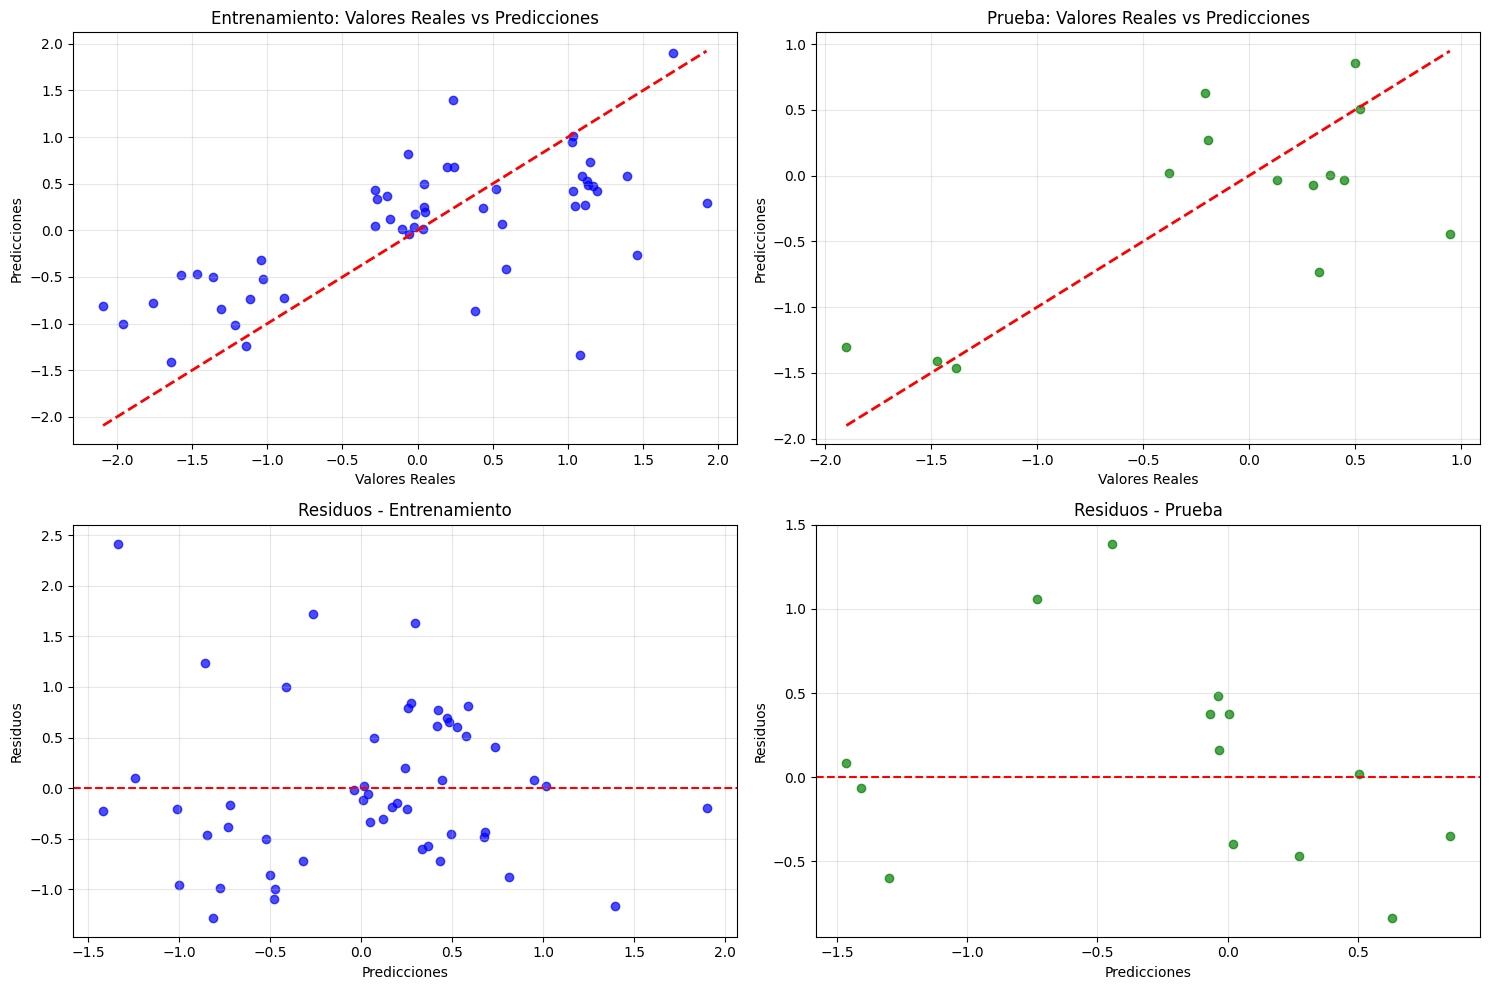

(LinearRegression(),
 {'r2_train': 0.44744085134905875,
  'r2_test': 0.46201185762787134,
  'rmse_train': 0.771623628940017,
  'rmse_test': 0.6079407111283798,
  'mae_train': 0.6035075141289287,
  'mae_test': 0.4762092027208051,
  'r2_adjusted': 0.41290590455837495})

In [32]:
nuevo_df = df.drop('igae', axis=1)
crear_y_evaluar_modelo_completo(nuevo_df)